Chargement des packages et la working directory 

In [1]:
import dask

ModuleNotFoundError: No module named 'dask'

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


os.chdir("C:/Users/Adam/Desktop/data_projet_1")



Ouverture des bases de données

In [193]:
df1 = pd.read_csv('EdStatsFootNote.csv')
df2= pd.read_csv('EdStatsCountry.csv')
df3= pd.read_csv('EdStatsCountry-Series.csv')
df4= pd.read_csv('EdStatsSeries.csv')
df5= pd.read_csv('EdStatsData.csv')

In [4]:
df5.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

# DF1 = EdStatsFootNote.csv Analyse

In [9]:
df1.head(10)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4,year
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN,2001.0
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN,2002.0
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN,2003.0
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN,2004.0
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN,2005.0
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN,2006.0
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN,2007.0
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN,2008.0
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN,2009.0
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN,2010.0


 ### type de données dans data frame 1 

In [10]:
df1.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
year           float64
dtype: object

In [11]:
df1.shape

(643638, 6)

In [12]:
df1.describe()

,Unnamed: 4,year
count,0.0,492.000000
mean,NaN,2246.500000
std,NaN,142.172431
min,NaN,2001.000000
25%,NaN,2123.750000
50%,NaN,2246.500000
75%,NaN,2369.250000
max,NaN,2492.000000


### Trouver les valeurs nulles ### 

In [13]:
df1.isnull().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
year           643146
dtype: int64

In [14]:
def number_of_na(data) :  #Fonction pour calculer le nombre et pourcentage de NA pour chaque colonne d'une dataframe donnée en argument
    number_of_na_list = list()
    percentage_of_na_list = list()
    columns = data.columns[:-1]
    for col in columns :
        number_of_na = data[col].isna().sum()
        percentage_of_na = number_of_na/len(data)
        number_of_na_list.append(number_of_na)
        percentage_of_na_list.append(percentage_of_na)
    na_data = pd.DataFrame(data = zip(*[columns, number_of_na_list, percentage_of_na_list]),
                           columns = ['Colonne', 'Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
    return(na_data)

In [15]:
number_of_na(df1)

,Colonne,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
0,CountryCode,0,0.0
1,SeriesCode,0,0.0
2,Year,0,0.0
3,DESCRIPTION,0,0.0
4,Unnamed: 4,643638,1.0


In [16]:
#Fonction permettant d'afficher le nombre de doublons pour le nombre de doublon dans la base df1
def get_number_of_duplicates(data) :
    print('Nombre de données dupliquées :', len(data) - len(data.drop_duplicates()))
    
    

In [17]:
valueurs_unique_coiuntry=df1['CountryCode'].drop_duplicates()

In [18]:
valueurs_unique_coiuntry

0         ABW
1712      AFG
3288      AGO
4704      ALB
6620      AND
         ... 
635816    XKX
635828    YEM
637443    ZAF
639819    ZMB
642158    ZWE
Name: CountryCode, Length: 239, dtype: object

In [19]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
643633    False
643634    False
643635    False
643636    False
643637    False
Length: 643638, dtype: bool

In [20]:
df1.duplicated().sum()

0

In [21]:
len(df1.drop_duplicates(['CountryCode']))

239

In [22]:
def compute_number_of_na(data) :
    number_of_na_list = list()
    percentage_of_na_list = list()
    columns = data.columns[:-1]
    for col in columns :
        number_of_na = data[col].isna().sum()
        percentage_of_na = number_of_na/len(data)
        number_of_na_list.append(number_of_na)
        percentage_of_na_list.append(percentage_of_na)
    na_data = pd.DataFrame(data = zip(*[columns, number_of_na_list, percentage_of_na_list]),
                           columns = ['Colonne', 'Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
    return(na_data)

In [23]:
compute_number_of_na(df1)

,Colonne,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
0,CountryCode,0,0.0
1,SeriesCode,0,0.0
2,Year,0,0.0
3,DESCRIPTION,0,0.0
4,Unnamed: 4,643638,1.0


In [24]:
### Faire un flitre sur les informations francaises

data_df1_France=df1[df1["CountryCode"]=="FRA"]

In [25]:
data_df1_France.head(2)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4,year
196020,FRA,SE.SEC.ENRL.TC.ZS,YR2005,Country Data,NaN,NaN
196021,FRA,SE.SEC.ENRL.TC.ZS,YR2006,Country Data,NaN,NaN


# DF2 = EdStatsCountry.csv Analyse

In [26]:
df2.head(2)

,Country_Code,Short_Name,Table_Name,Long_Name,2-alpha_code,Currency_Unit,Special_Notes,Region,Income_Group,WB-2_code,...,Government_Accounting_concept,IMF_data_dissemination_standard,Latest_population_census,Latest_household_survey,Source_of_most_recent_Income_and_expenditure_data,Vital_registration_complete,Latest_agricultural_census,Latest_industrial_data,Latest_trade_data,Latest_water_withdrawal_data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country_Code                                       241 non-null    object 
 1   Short_Name                                         241 non-null    object 
 2   Table_Name                                         241 non-null    object 
 3   Long_Name                                          241 non-null    object 
 4   2-alpha_code                                       238 non-null    object 
 5   Currency_Unit                                      215 non-null    object 
 6   Special_Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income_Group                                       214 non-null    object 
 9   WB-2_code 

In [454]:
df2.shape

(241, 31)

In [455]:
df2.describe() ### pourquoi il affiche uniquement trois variables ???  Est ce que python detecte uniquement les variables numériques pour ce packages ??

,National_accounts_reference_year,Latest_industrial_data,Latest_trade_data
count,32.00000,107.000000,185.000000
mean,2001.53125,2008.102804,2010.994595
std,5.24856,2.616834,2.569675
min,1987.00000,2000.000000,1995.000000
25%,1996.75000,2007.500000,2011.000000
50%,2002.00000,2009.000000,2012.000000
75%,2005.00000,2010.000000,2012.000000
max,2012.00000,2010.000000,2012.000000


In [28]:
data_df2_France=df2[df2["Country_Code"]=="FRA"]

In [29]:
data_df2_France

,Country_Code,Short_Name,Table_Name,Long_Name,2-alpha_code,Currency_Unit,Special_Notes,Region,Income_Group,WB-2_code,...,Government_Accounting_concept,IMF_data_dissemination_standard,Latest_population_census,Latest_household_survey,Source_of_most_recent_Income_and_expenditure_data,Vital_registration_complete,Latest_agricultural_census,Latest_industrial_data,Latest_trade_data,Latest_water_withdrawal_data
71,FRA,France,France,French Republic,FR,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,High income: OECD,FR,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2006. Rolling census based on continuous sampl...,NaN,"Expenditure survey/budget survey (ES/BS), 1994/95",Yes,2010,2009.0,2012.0,2007


# DF5 = EdStatsData.csv Analyse

In [32]:
df5.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [459]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [28]:
df5.shape

(886930, 70)

In [29]:
data_df5_France=df5[df5["Country Code"]=="FRA"]

In [30]:
data_df5_France.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
337180,France,FRA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337181,France,FRA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data_na_df5=compute_number_of_na(df5)

In [34]:
data_na_df5_sorted=data_na_df5.sort_values(by=['Nombre de valeurs manquantes'], ascending=False)

In [35]:
data_na_df5_sorted

,Colonne,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
51,2017,886787,0.999839
50,2016,870470,0.981442
5,1971,851393,0.959933
7,1973,851385,0.959924
6,1972,851311,0.959840
...,...,...,...
44,2010,644488,0.726650
1,Country Code,0,0.000000
3,Indicator Code,0,0.000000
2,Indicator Name,0,0.000000


In [37]:
def statistique(data, feature) :
    mean_data = data.groupby([feature], as_index = False).mean()
    median_data = data.groupby([feature], as_index = False).median()
    std_data = data.groupby([feature], as_index = False).std()
    return([mean_data, median_data, std_data])

In [38]:
EdStatsData_moyenne_df5, EdStatsData_mediane_df5, EdStatsData_std_df5=statistique(df5, 'Country Code')

In [39]:
EdStatsData_moyenne_df5

,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,ABW,6.241093e+03,6.261026e+03,6.275733e+03,6.281868e+03,6.272428e+03,6.246966e+03,6.206650e+03,6.160233e+03,6.107166e+03,...,2.342825,2.372825,2.403214,2.427695,2.442662,2.446818,2.444805,2.433669,2.422208,NaN
1,AFG,6.872726e+06,2.707042e+07,2.083073e+07,1.513098e+07,1.262313e+07,9.039210e+06,3.193784e+07,1.900767e+07,2.286696e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,7.229431e+05,3.894499e+05,3.390958e+05,5.965924e+05,7.228874e+05,8.192646e+05,8.423122e+05,8.667980e+05,8.434500e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,2.787310e+04,1.511080e+05,1.636166e+05,2.460375e+05,2.517227e+05,3.141569e+04,1.476320e+05,2.737309e+05,1.218210e+05,...,22.458636,21.922597,21.369545,20.734578,19.995032,19.185552,18.378799,17.638929,16.974123,NaN
4,AND,2.686961e+07,1.841287e+07,2.017866e+07,2.220384e+07,2.388415e+07,1.561036e+07,2.533898e+07,4.053531e+07,4.235450e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,XKX,6.095012e+05,6.235011e+05,6.390012e+05,6.540012e+05,6.695012e+05,6.845011e+05,7.000011e+05,7.150011e+05,7.300010e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,YEM,7.983652e+04,6.658342e+05,6.772522e+05,6.904346e+05,7.063586e+05,8.849143e+04,7.479483e+05,7.736975e+05,8.024421e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,ZAF,3.695001e+08,3.341124e+09,3.420783e+09,3.567305e+09,4.187598e+09,5.718089e+08,4.291152e+09,4.065801e+09,4.345108e+09,...,429.414351,431.128377,430.176851,427.138344,422.989545,417.318994,410.529513,401.765584,392.230747,NaN
240,ZMB,1.975670e+07,8.503428e+07,4.234110e+07,5.337419e+07,5.062605e+07,2.116730e+07,4.245840e+07,4.084195e+07,5.039788e+07,...,214.348539,226.351136,237.630162,247.860357,256.420162,263.929383,270.275162,275.921461,280.762565,NaN


In [40]:
df5.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [471]:
EdStatsData_moyenne_df5

,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,ABW,6.241093e+03,6.261026e+03,6.275733e+03,6.281868e+03,6.272428e+03,6.246966e+03,6.206650e+03,6.160233e+03,6.107166e+03,...,2.342825,2.372825,2.403214,2.427695,2.442662,2.446818,2.444805,2.433669,2.422208,NaN
1,AFG,6.872726e+06,2.707042e+07,2.083073e+07,1.513098e+07,1.262313e+07,9.039210e+06,3.193784e+07,1.900767e+07,2.286696e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,7.229431e+05,3.894499e+05,3.390958e+05,5.965924e+05,7.228874e+05,8.192646e+05,8.423122e+05,8.667980e+05,8.434500e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,2.787310e+04,1.511080e+05,1.636166e+05,2.460375e+05,2.517227e+05,3.141569e+04,1.476320e+05,2.737309e+05,1.218210e+05,...,22.458636,21.922597,21.369545,20.734578,19.995032,19.185552,18.378799,17.638929,16.974123,NaN
4,AND,2.686961e+07,1.841287e+07,2.017866e+07,2.220384e+07,2.388415e+07,1.561036e+07,2.533898e+07,4.053531e+07,4.235450e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,XKX,6.095012e+05,6.235011e+05,6.390012e+05,6.540012e+05,6.695012e+05,6.845011e+05,7.000011e+05,7.150011e+05,7.300010e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,YEM,7.983652e+04,6.658342e+05,6.772522e+05,6.904346e+05,7.063586e+05,8.849143e+04,7.479483e+05,7.736975e+05,8.024421e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,ZAF,3.695001e+08,3.341124e+09,3.420783e+09,3.567305e+09,4.187598e+09,5.718089e+08,4.291152e+09,4.065801e+09,4.345108e+09,...,429.414351,431.128377,430.176851,427.138344,422.989545,417.318994,410.529513,401.765584,392.230747,NaN
240,ZMB,1.975670e+07,8.503428e+07,4.234110e+07,5.337419e+07,5.062605e+07,2.116730e+07,4.245840e+07,4.084195e+07,5.039788e+07,...,214.348539,226.351136,237.630162,247.860357,256.420162,263.929383,270.275162,275.921461,280.762565,NaN


In [41]:
EdStatsData_mediane_df5

,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,ABW,1578.000000,1553.000000,1491.000000,1483.000000,1488.000000,1480.000000,1462.000000,1411.000000,1344.000000,...,0.185,0.18,0.18,0.175,0.165,0.150,0.14,0.125,0.110,NaN
1,AFG,0.510000,503.000000,96.508389,30.216125,27.266790,0.774060,96.031666,29.278391,27.423210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,286309.000000,76.091591,330.000000,103649.000000,187501.000000,319561.000000,327504.000000,336209.000000,225137.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,4.960000,5367.500000,28568.000000,96652.500000,98248.500000,6.205000,31664.000000,111754.000000,116.076717,...,0.180,0.17,0.17,0.160,0.150,0.140,0.13,0.120,0.110,NaN
4,AND,810.000000,317.000000,341.000000,299.000000,319.000000,92.047379,287.000000,991.000000,897.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,XKX,609501.161878,623501.135491,639001.227784,654001.160145,669501.171191,684501.107874,700001.119585,715001.060110,730001.038100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,YEM,0.040000,199229.500000,201316.000000,204940.500000,211986.500000,0.000000,227725.500000,236392.000000,245708.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,ZAF,6.400000,559236.000000,570485.000000,526984.000000,588919.500000,6.000000,616967.500000,577661.000000,589690.000000,...,0.225,0.24,0.22,0.200,0.185,0.165,0.17,0.180,0.190,NaN
240,ZMB,2.890000,18487.000000,48.482208,51.939771,45.459461,3.485686,20.600960,20.449815,48.544140,...,0.255,0.25,0.25,0.240,0.225,0.220,0.21,0.220,0.230,NaN


# SLICING UN DATAFRAME

In [42]:
### Prendre uniquement les variables avec leurs naming 
df4[["Series Code","Topic"]] #1

,Series Code,Topic
0,BAR.NOED.1519.FE.ZS,Attainment
1,BAR.NOED.1519.ZS,Attainment
2,BAR.NOED.15UP.FE.ZS,Attainment
3,BAR.NOED.15UP.ZS,Attainment
4,BAR.NOED.2024.FE.ZS,Attainment
...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures


In [43]:
df4[:]    #2 Slicing demandé par JM

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


SLICING 6 PREMIERE LIGNE PUIS DEPUIS SERIES CODE JUSQU'A Indicator Name

In [44]:
df4.loc[0:6,"Series Code":"Indicator Name"]

,Series Code,Topic,Indicator Name
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
5,BAR.NOED.2024.ZS,Attainment,Barro-Lee: Percentage of population age 20-24 ...
6,BAR.NOED.2529.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...


In [45]:
df4.loc[0:6,:] # Six première ligne mais apparition de toutes les variables

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BAR.NOED.2024.ZS,Attainment,Barro-Lee: Percentage of population age 20-24 ...,Percentage of population age 20-24 with no edu...,Percentage of population age 20-24 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BAR.NOED.2529.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 25-29 with...,Percentage of female population age 25-29 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#FOCUS SUR LA BASE DF5 COMPORTANT DES DONNEES QUANTITATIVES

In [46]:
compute_number_of_na(df5)

,Colonne,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
0,Country Name,0,0.000000
1,Country Code,0,0.000000
2,Indicator Name,0,0.000000
3,Indicator Code,0,0.000000
4,1970,814642,0.918496
...,...,...,...
64,2080,835494,0.942007
65,2085,835494,0.942007
66,2090,835494,0.942007
67,2095,835494,0.942007


In [49]:
df5_reduit=df5.loc[:,"Country Name":"2035"]
df5_reduit.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
na_df5_na=compute_number_of_na(df5_reduit)

In [51]:
na_df5_na.sort_values(by=['Nombre de valeurs manquantes'], ascending=False)

,Colonne,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
51,2017,886787,0.999839
50,2016,870470,0.981442
5,1971,851393,0.959933
7,1973,851385,0.959924
6,1972,851311,0.959840
8,1974,851200,0.959715
13,1979,850121,0.958498
10,1976,849447,0.957738
16,1982,849419,0.957707
23,1989,849390,0.957674


In [52]:
na_df5_na.head(10)

,Colonne,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
0,Country Name,0,0.000000
1,Country Code,0,0.000000
2,Indicator Name,0,0.000000
3,Indicator Code,0,0.000000
4,1970,814642,0.918496
5,1971,851393,0.959933
6,1972,851311,0.959840
7,1973,851385,0.959924
8,1974,851200,0.959715
9,1975,799624,0.901564


In [53]:
df5.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df5["Indicator Name"].nunique()

3665

In [55]:
list(df5["Indicator Name"].unique())

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

# Graphique illustrant un nombre de jeu de donnée

In [56]:
df2.head(1)

,Country_Code,Short_Name,Table_Name,Long_Name,2-alpha_code,Currency_Unit,Special_Notes,Region,Income_Group,WB-2_code,...,Government_Accounting_concept,IMF_data_dissemination_standard,Latest_population_census,Latest_household_survey,Source_of_most_recent_Income_and_expenditure_data,Vital_registration_complete,Latest_agricultural_census,Latest_industrial_data,Latest_trade_data,Latest_water_withdrawal_data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN


In [57]:
df2.groupby('Region')[['Short_Name']].count()

,Short_Name
Region,
East Asia & Pacific,36
Europe & Central Asia,57
Latin America & Caribbean,41
Middle East & North Africa,21
North America,3
South Asia,8
Sub-Saharan Africa,48


Text(0.5, 1.0, 'Pays par région')

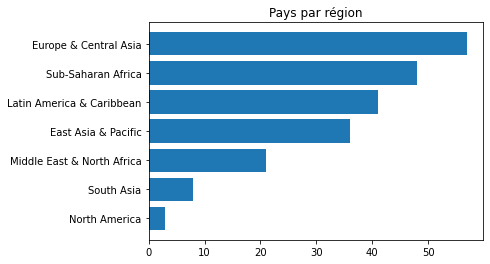

In [58]:
plt.barh(y = df2.groupby('Region')[['Short_Name']].count().reset_index().sort_values(by='Short_Name')['Region'],
         width = df2.groupby('Region')
         [['Short_Name']].count()['Short_Name'].sort_values())

plt.title('Pays par région')

In [59]:
df2.groupby('Region')[['Short_Name']].count().reset_index().sort_values(by='Short_Name')['Region']

4                 North America
5                    South Asia
3    Middle East & North Africa
0           East Asia & Pacific
2     Latin America & Caribbean
6            Sub-Saharan Africa
1         Europe & Central Asia
Name: Region, dtype: object

In [60]:
###Statistiques descriptives pour un pays d'Asie : Chine 
df5.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [62]:
df1.describe()

,Unnamed: 4,year
count,0.0,492.000000
mean,NaN,2246.500000
std,NaN,142.172431
min,NaN,2001.000000
25%,NaN,2123.750000
50%,NaN,2246.500000
75%,NaN,2369.250000
max,NaN,2492.000000


In [63]:
df2.describe() ## Statistiques par rapport aux variable 

,National_accounts_reference_year,Latest_industrial_data,Latest_trade_data
count,32.00000,107.000000,185.000000
mean,2001.53125,2008.102804,2010.994595
std,5.24856,2.616834,2.569675
min,1987.00000,2000.000000,1995.000000
25%,1996.75000,2007.500000,2011.000000
50%,2002.00000,2009.000000,2012.000000
75%,2005.00000,2010.000000,2012.000000
max,2012.00000,2010.000000,2012.000000


In [64]:
###Check de la base comportant la masse de donnée df5 edsdata

import collections
mot_indicateur = [i.split(' ', 1)[0] for i in df5['Indicator Name'].tolist()]
mots_indicateurs_rep = collections.Counter(mot_indicateur).most_common(30)

In [65]:
mots_indicateurs_rep

[('EGRA:', 97526),
 ('Barro-Lee:', 87120),
 ('Wittgenstein', 74536),
 ('UIS:', 58322),
 ('Percentage', 57838),
 ('SABER:', 52030),
 ('Population,', 46706),
 ('PASEC:', 33880),
 ('DHS:', 31460),
 ('LLECE:', 30734),
 ('MICS:', 29040),
 ('Enrolment', 24926),
 ('Africa', 24442),
 ('TIMSS:', 24200),
 ('PISA:', 23958),
 ('PIAAC:', 23716),
 ('Gross', 14762),
 ('SACMEQ:', 13068),
 ('Government', 10406),
 ('Repetition', 10164),
 ('School', 8470),
 ('Population', 8228),
 ('Drop-out', 7986),
 ('Net', 7744),
 ('Repeaters', 7260),
 ('PIRLS:', 6050),
 ('Teachers', 4840),
 ('Expenditure', 4356),
 ('Adjusted', 3872),
 ('Annual', 3872)]

### Le nombre de fois ou se repete les indicateur pour savoir ou nous avons une abondance d'information nécéssaire à exploiter 

In [66]:
mots_indicateurs_rep.reverse() ## transformation d'une sequence en list pour pouvoir faire un plotting

In [67]:
##transforation en DF
df_rep = pd.DataFrame(mots_indicateurs_rep, columns =['Mot', 'Nombre']).sort_values(by='Nombre', 
                                                                                      ascending=False)

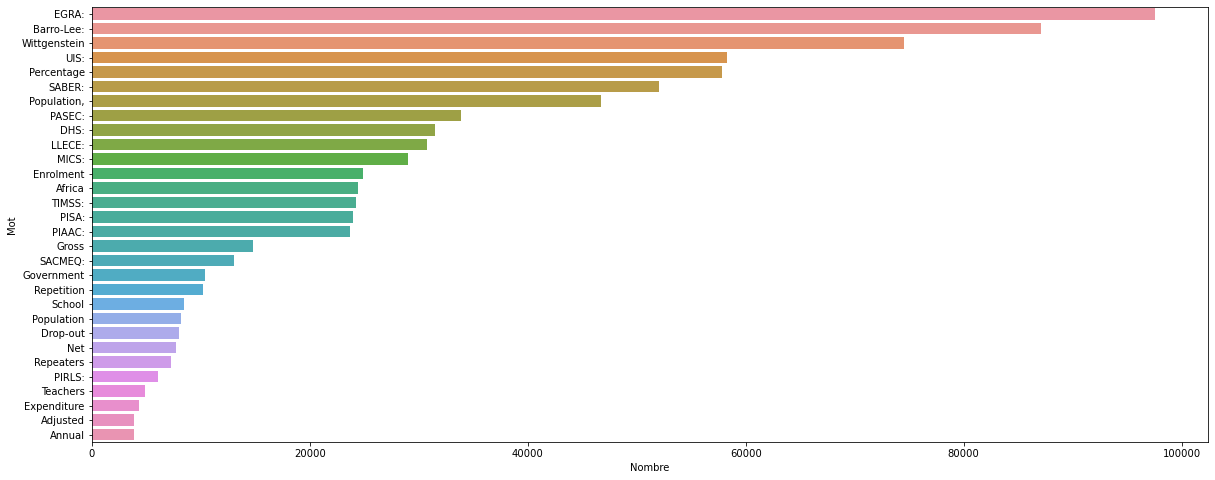

In [68]:
plt.figure(figsize=(20, 8))
graph_df5_rep=sns.barplot(y = 'Mot', x='Nombre', data = df_rep)

In [47]:
df2.head(1)

,Country_Code,Short_Name,Table_Name,Long_Name,2-alpha_code,Currency_Unit,Special_Notes,Region,Income_Group,WB-2_code,...,Government_Accounting_concept,IMF_data_dissemination_standard,Latest_population_census,Latest_household_survey,Source_of_most_recent_Income_and_expenditure_data,Vital_registration_complete,Latest_agricultural_census,Latest_industrial_data,Latest_trade_data,Latest_water_withdrawal_data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN


#  GRAPHIQUE NB PAYS PAR GROUPE DE REVENU

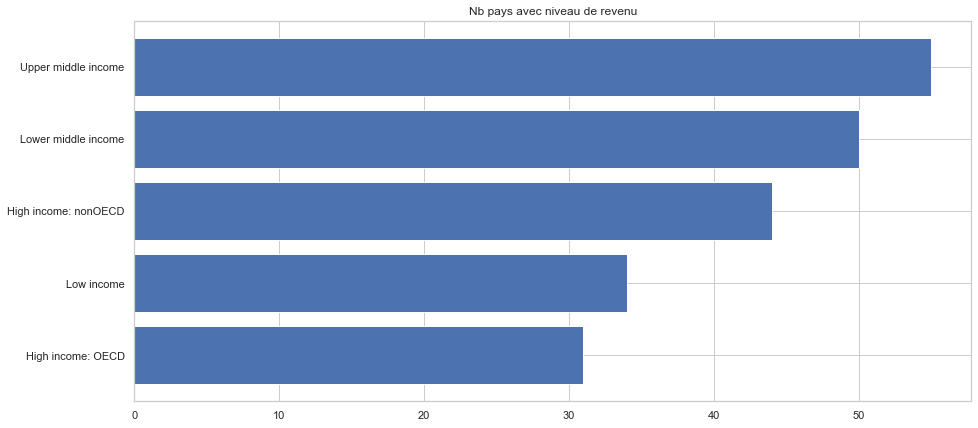

In [48]:
plt.figure(figsize=(15,7))
plt.barh(y = df2.groupby('Income_Group')[['Short_Name']].count().reset_index().
         sort_values(by='Short_Name')['Income_Group'], 
                     width = df2.groupby('Income_Group')[['Short_Name']].count()['Short_Name'].sort_values())
plt.title('Nb pays avec niveau de revenu')
plt.show()

# Reduction du nombre de variable dans EDSDATA

In [194]:
df5.head()

,CountryName,CountryCode,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
df5['moyenne_1980']=df5[[str(year) for year in range(1970,1989,1)]].mean(1)
df5['moyenne_1990']=df5[[str(year) for year in range(1990,2000,1)]].mean(1)
df5['moyenne_2010']=df5[[str(year) for year in range(2001,2010,1)]].mean(1)
df5['moyenne_2011']=df5[[str(year) for year in range(2011,2017,1)]].mean(1)
df5['moyenne_2020']=df5[[str(year) for year in range(2020,2021,1)]].mean(1)
df5.loc[:,'1970':'2100'].drop

<bound method DataFrame.drop of              1970       1971       1972       1973       1974      1975  \
0             NaN        NaN        NaN        NaN        NaN       NaN   
1             NaN        NaN        NaN        NaN        NaN       NaN   
2             NaN        NaN        NaN        NaN        NaN       NaN   
3             NaN        NaN        NaN        NaN        NaN       NaN   
4       54.822121  54.894138  56.209438  57.267109  57.991138  59.36554   
...           ...        ...        ...        ...        ...       ...   
886925        NaN        NaN        NaN        NaN        NaN       NaN   
886926        NaN        NaN        NaN        NaN        NaN       NaN   
886927        NaN        NaN        NaN        NaN        NaN       NaN   
886928        NaN        NaN        NaN        NaN        NaN       NaN   
886929        NaN        NaN        NaN        NaN        NaN       NaN   

             1976      1977      1978       1979  ...  2055  2060  

In [200]:
df5.head(2)

,CountryName,CountryCode,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2080,2085,2090,2095,2100,moyenne_1980,moyenne_1990,moyenne_2010,moyenne_2011,moyenne_2020
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
compute_number_of_na(df5)

,Colonne,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
0,CountryName,0,0.000000
1,CountryCode,0,0.000000
2,Indicator Name,0,0.000000
3,Indicator Code,0,0.000000
4,1970,814642,0.918496
...,...,...,...
68,2100,835494,0.942007
69,moyenne_1980,774497,0.873234
70,moyenne_1990,690339,0.778347
71,moyenne_2010,629419,0.709660


In [262]:
df5.groupby('CountryName')[['moyenne_1980','moyenne_1990','moyenne_2010','moyenne_2011']].count()

,moyenne_1980,moyenne_1990,moyenne_2010,moyenne_2011
CountryName,,,,
Afghanistan,785,876,865,868
Albania,510,965,1706,1461
Algeria,762,1048,1328,1184
American Samoa,83,49,18,8
Andorra,106,232,663,603
...,...,...,...,...
West Bank and Gaza,41,847,974,1388
World,211,335,341,662
"Yemen, Rep.",410,1025,1280,872


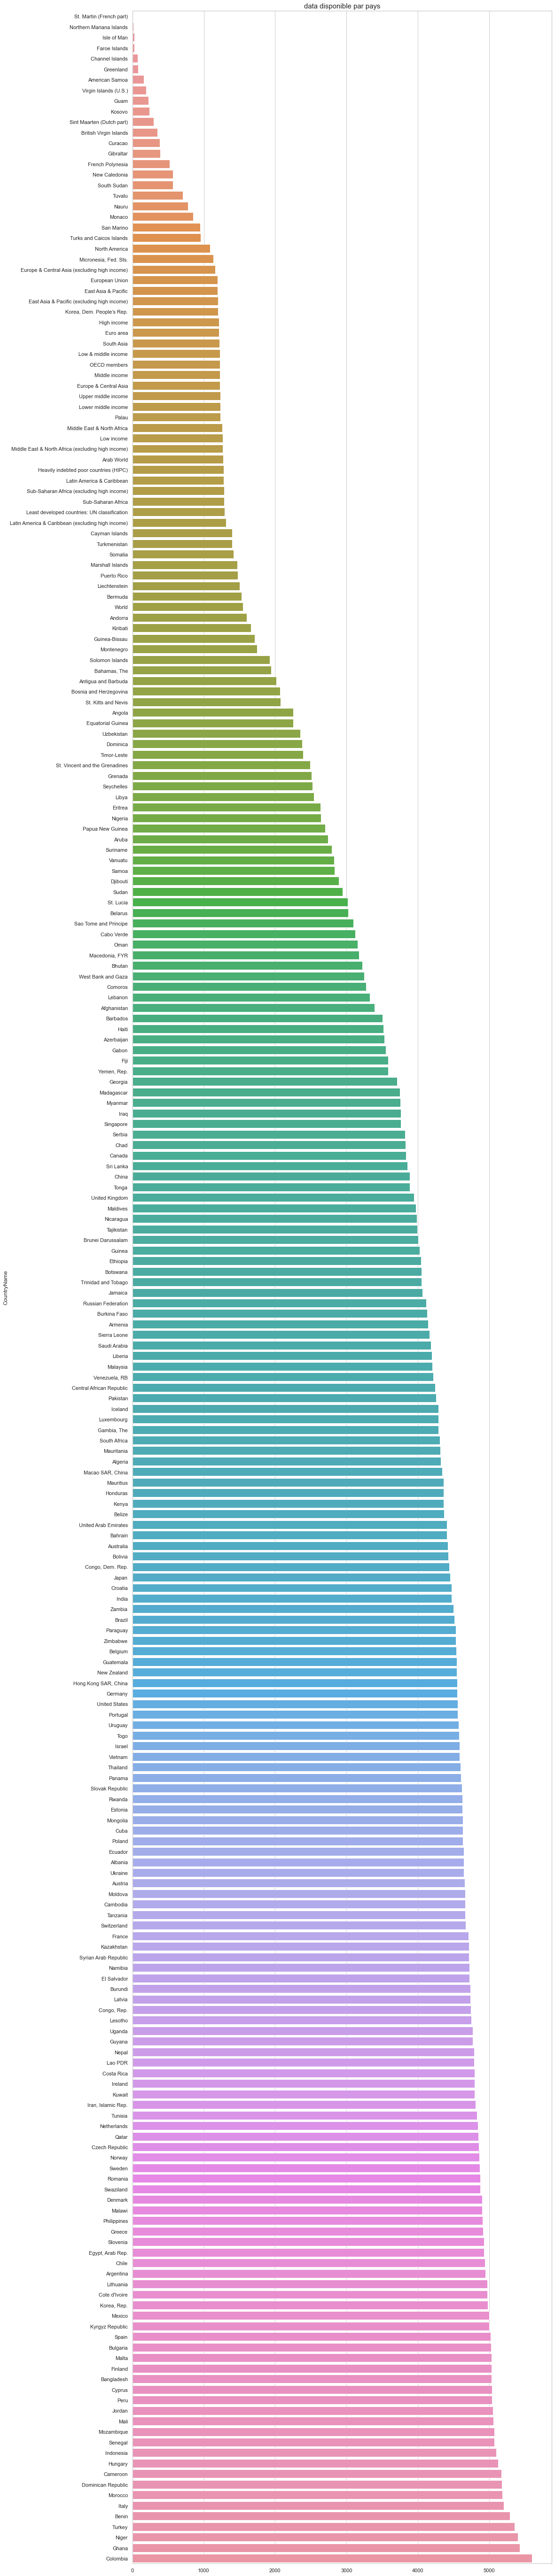

In [263]:
plt.figure(figsize=(16, 100))
plt.title('data disponible par pays', size=15)
plot = sns.barplot(x = df5.groupby('CountryName')[['moyenne_1980','moyenne_1990','moyenne_2010','moyenne_2011']].count().sum(axis=1).sort_values().values, 
                   y = df5.groupby('CountryName')[['moyenne_1980','moyenne_1990','moyenne_2010','moyenne_2011']].count().sum(axis=1).sort_values().index)
plt.show()

Indicateur les plus pertinents à voir de prêt avec de procéder aux filtres nécéssaires par pays 

In [440]:
indicateur_etude=['UIS.E.3','SE.TER.ENRL','IT.NET.USER.P2','UIS.E.3','SE.TER.ENRL']
df5_2=df5[df5['Indicator Code'].isin(indicateur_etude)]
df5_edu=df5_2[df5_2["Indicator Code"]=="UIS.E.3"]
df5_net=df5_2[df5_2["Indicator Code"]=="IT.NET.USER.P2"]
df5_demo=df5_2[df5_2["Indicator Code"]=="SE.TER.ENRL"]

Statistique par pays en fonction des indicateurs

In [266]:
EdStatsData_moyenne_df5_2, EdStatsData_mediane_df5_2, EdStatsData_std_df5_2=statistique(df5_net, 'CountryCode')
EdStatsData_moyenne_df5_2

,CountryCode,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2080,2085,2090,2095,2100,moyenne_1980,moyenne_1990,moyenne_2010,moyenne_2011,moyenne_2020
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.424854,30.444444,81.313947,NaN
1,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.202695,7.035045,NaN
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019373,1.087250,9.016667,NaN
3,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.039737,11.095352,58.428723,NaN
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.819734,44.703431,92.029177,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019120,2.916886,20.594353,NaN
239,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.058599,7.786757,46.064853,NaN
240,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.030177,3.049620,17.645796,NaN


In [267]:
EdStatsData_mediane_df5_2

,CountryCode,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2080,2085,2090,2095,2100,moyenne_1980,moyenne_1990,moyenne_2010,moyenne_2011,moyenne_2020
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.424854,30.444444,81.313947,NaN
1,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.202695,7.035045,NaN
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019373,1.087250,9.016667,NaN
3,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.039737,11.095352,58.428723,NaN
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.819734,44.703431,92.029177,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019120,2.916886,20.594353,NaN
239,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.058599,7.786757,46.064853,NaN
240,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.030177,3.049620,17.645796,NaN


In [268]:
df5_2.groupby(['CountryCode','Indicator Name'])['moyenne_1980','moyenne_1990','moyenne_2010','moyenne_2011'].mean()

C:\Users\Adam\anaconda3\envs\OCenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


moyenne_1980  \
CountryCode Indicator Name                                                     
ABW         Enrolment in tertiary education, all programmes...           NaN   
            Enrolment in upper secondary education, both se...           NaN   
            Internet users (per 100 people)                              NaN   
AFG         Enrolment in tertiary education, all programmes...  15044.384615   
            Enrolment in upper secondary education, both se...           NaN   
...                                                                      ...   
ZMB         Enrolment in upper secondary education, both se...           NaN   
            Internet users (per 100 people)                              NaN   
ZWE         Enrolment in tertiary education, all programmes...  10154.375000   
            Enrolment in upper secondary education, both se...           NaN   
            Internet users (per 100 people)                              NaN   

                                                                 moyenne_1990  \
CountryCode Indicator Name                                                      
ABW         Enrolment in tertiary education, all programmes...    1446.000000   
            Enrolment in upper secondary education, both se...    3258.000000   
            Internet users (per 100 people)                          2.424854   
AFG         Enrolment in tertiary education, all programmes...   24333.000000   
            Enrolment in upper secondary education, both se...            NaN   
...                                                                       ...   
ZMB         Enrolment in upper secondary education, both se...            NaN   
            Internet users (per 100 people)                          0.030177   
ZWE         Enrolment in tertiary education, all programmes...   54321.666667   
            Enrolment in upper secondary education, both se...  391080.000000   
            Internet users (per 100 people)                          0.043231   

                                                                 moyenne_2010  \
CountryCode Indicator Name                                                      
ABW         Enrolment in tertiary education, all programmes...    1940.666667   
            Enrolment in upper secondary education, both se...    3795.222222   
            Internet users (per 100 people)                         30.444444   
AFG         Enrolment in tertiary education, all programmes...   49681.333333   
            Enrolment in upper secondary education, both se...  249953.000000   
...                                                                       ...   
ZMB         Enrolment in upper secondary education, both se...            NaN   
            Internet users (per 100 people)                          3.049620   
ZWE         Enrolment in tertiary education, all programmes...            NaN   
            Enrolment in upper secondary education, both se...  396675.000000   
            Internet users (per 100 people)                          2.344427   

                                                                 moyenne_2011  
CountryCode Indicator Name                                                     
ABW         Enrolment in tertiary education, all programmes...    1741.400000  
            Enrolment in upper secondary education, both se...    4405.500000  
            Internet users (per 100 people)                         81.313947  
AFG         Enrolment in tertiary education, all programmes...  180189.000000  
            Enrolment in upper secondary education, both se...  890714.000000  
...                                                                       ...  
ZMB         Enrolment in upper secondary education, both se...            NaN  
            Internet users (per 100 people)                         17.645796  
ZWE         Enrolment in tertiary education, all programmes...  104246.750000  
            Enrolment in upper seco

In [409]:
df5_demo=df5_2[df5_2["Indicator Code"]=="SE.TER.ENRL"]
df5_demo=df5_demo[['CountryName', 'moyenne_2010']]
df5_net=df5_net[['CountryName', 'moyenne_2010']]
df5_edu=df5_edu[['CountryName', 'moyenne_2010']]


Moyenne de la population agée de 14 a 25

In [270]:
df5_edu['moyenne_2010']

1214      1.019110e+07
4879      5.654697e+07
8544      4.894854e+07
12209     1.276640e+07
15874     3.424290e+07
              ...     
869819             NaN
873484    1.115506e+05
877149    5.644888e+05
880814             NaN
884479    3.966750e+05
Name: moyenne_2010, Length: 242, dtype: float64

In [279]:
df5_edu1=df5_edu[df5_edu["moyenne_2010"]>6095710.230138524]

In [280]:
df5_edu1.head(2)

,CountryName,moyenne_2010
1214,Arab World,1.019110e+07
4879,East Asia & Pacific,5.654697e+07


# Un classement décroissant concernant la moyenne d'intégration aux études supérieures

In [299]:
df5_edu1_sorted=df5_edu1.sort_values(by=['moyenne_2010'], ascending=False) 
df5_edu1_sorted


,CountryName,moyenne_2010
89174,World,1.991336e+08
45194,Low & middle income,1.551774e+08
63519,Middle income,1.487569e+08
85509,Upper middle income,7.774568e+07
52524,Lower middle income,7.101123e+07
4879,East Asia & Pacific,5.654697e+07
8544,East Asia & Pacific (excluding high income),4.894854e+07
70849,OECD members,4.783656e+07
74514,South Asia,4.672920e+07
30534,High income,4.395620e+07


# Un plot qui nous permettra de voir qu'elles sont les pays avec le plus d'insertion aux études supérieures et nous enlevons egalement les continents et les lignes du types ( Countries with high income etc ...) afin de se focaliser uniquement sur le scope de pays qui nous concerne et mettre un top 5 

In [329]:

df5_edu1_sorted.query('CountryName != ["Middle East & North Africa (excluding high income)","Low income","Arab World","Least developed countries: UN classification","Heavily indebted poor countries (HIPC)","east developed countries: UN classification","Sub-Saharan Africa","Sub-Saharan Africa (excluding high income)","Euro area","North America","Europe & Central Asia (excluding high income)","Middle East & North Africa","Latin America & Caribbean (excluding high income)","European Union","Latin America & Caribbean","Europe & Central Asia","High income","South Asia","OECD members","East Asia & Pacific (excluding high income)","East Asia & Pacific","World", "Low & middle income","Middle income","Upper middle income","Lower middle income"]', inplace=True)
df5_edu1_sorted

,CountryName,moyenne_2010
415359,India,3.764143e+07
243104,China,3.529761e+07
847829,United States,1.125276e+07
188129,Brazil,9.398842e+06
419024,Indonesia,6.520710e+06


C:\Users\Adam\anaconda3\envs\OCenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


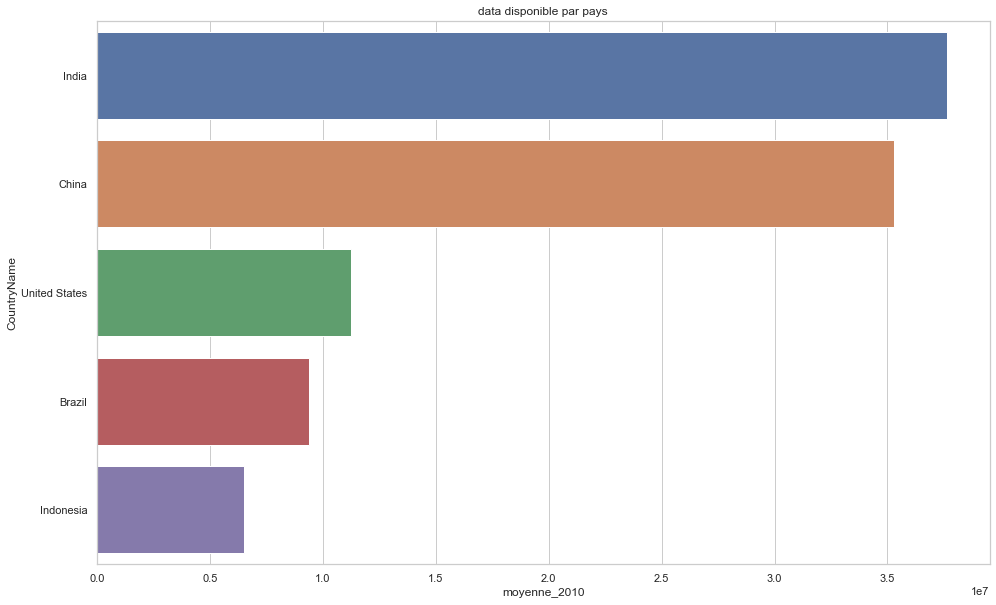

In [330]:
y=df5_edu1_sorted['CountryName']
x=df5_edu1_sorted['moyenne_2010']

plt.figure(figsize=(16, 10))
plt.title('data disponible par pays', size=12)
plot = sns.barplot(x , 
                   y )
plt.show() 

# Travaux liés à la démographie et population entre 14 ans et 25 ans

In [346]:
df5_demo=df5_demo[['CountryName', 'moyenne_2010']]
df5_demo['moyenne_2010'].mean()

4435668.262326754

C:\Users\Adam\anaconda3\envs\OCenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


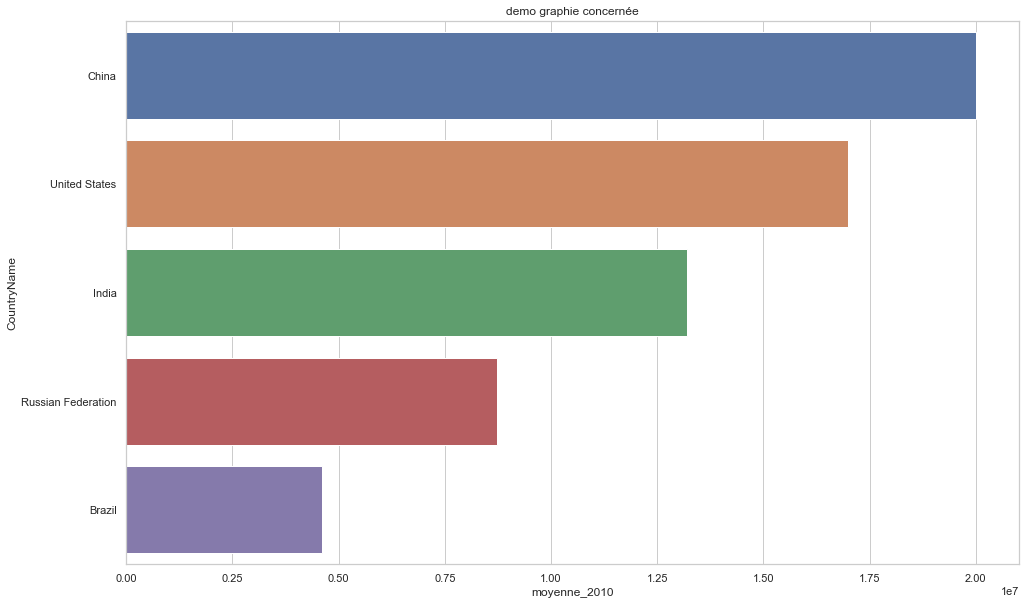

In [349]:
df5_demo1=df5_demo[df5_demo["moyenne_2010"]>4435668.262326754]
df5_demo1=df5_demo1.sort_values(by=['moyenne_2010'], ascending=False)

df5_demo1.query('CountryName != ["Middle East & North Africa (excluding high income)","Low income","Arab World","Least developed countries: UN classification","Heavily indebted poor countries (HIPC)","east developed countries: UN classification","Sub-Saharan Africa","Sub-Saharan Africa (excluding high income)","Euro area","North America","Europe & Central Asia (excluding high income)","Middle East & North Africa","Latin America & Caribbean (excluding high income)","European Union","Latin America & Caribbean","Europe & Central Asia","High income","South Asia","OECD members","East Asia & Pacific (excluding high income)","East Asia & Pacific","World", "Low & middle income","Middle income","Upper middle income","Lower middle income"]', inplace=True)

y=df5_demo1['CountryName']
x=df5_demo1['moyenne_2010']

plt.figure(figsize=(16, 10))
plt.title('demo graphie concernée', size=12)
plot = sns.barplot(x , 
                   y )
plt.show() 

# Même méthodologie pour le taux d'insertion d'internet dans les pays qui nous concerne dans ce scope. Verifier si le taux d'internet existe bien dans les pays qui ressort ci-dessous

C:\Users\Adam\anaconda3\envs\OCenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


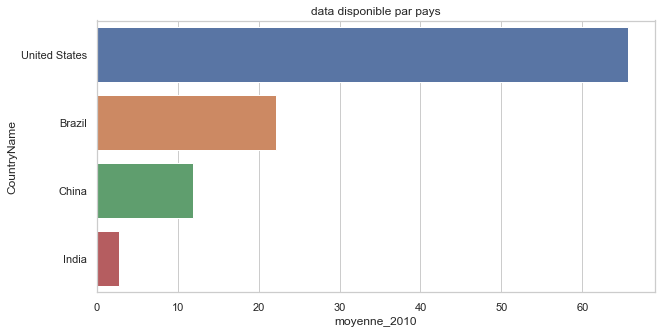

In [448]:
df5_net.query('CountryName != ["Middle East & North Africa (excluding high income)","Low income","Arab World","Least developed countries: UN classification","Heavily indebted poor countries (HIPC)","east developed countries: UN classification","Sub-Saharan Africa","Sub-Saharan Africa (excluding high income)","Euro area","North America","Europe & Central Asia (excluding high income)","Middle East & North Africa","Latin America & Caribbean (excluding high income)","European Union","Latin America & Caribbean","Europe & Central Asia","High income","South Asia","OECD members","East Asia & Pacific (excluding high income)","East Asia & Pacific","World", "Low & middle income","Middle income","Upper middle income","Lower middle income"]', inplace=True)
df5_net.query('CountryName == ["Brazil","China","India","United States"]', inplace=True)
df5_net=df5_net.sort_values(by=['moyenne_2010'], ascending=False)

y=df5_net['CountryName']
x=df5_net['moyenne_2010'] 



plt.figure(figsize=(10, 5))
plt.title('data disponible par pays', size=12)
plot = sns.barplot(x , y )
plt.show() ### ce tableau en le croisant avec la démographie qui nous concerne on voit bien aussi qu'il y a un bon taux de pénétration d'internet pour la population que nous avons ciblé

# Conclusion : Nous constatons que pour les trois pays US,Brésil et Chine ont un taux interessant de pénétration d'internet par habitant contrairement à l'inde. Néanmoins l'inde reste un pays potentiellement important car celui est classé premier terme population intégrant les études supérieures et troisième dont la population est agée entre 15 et 24 ans. 

# --> Pays recommandé sont ETATS UNIS CHINE BRESIL INDE